# Comparing Investment Strategies

## Trevor Nguyen and Bondith Sovann

In [ ]:
# Install library for technical indicators
import os
os.chdir("/usr")

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -P /usr
!tar -xzf ta-lib-0.4.0-src.tar.gz

--2023-12-03 22:57:00--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 22:57:01--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 22:57:01--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
import os
os.chdir('/usr/ta-lib')

In [ ]:
!./configure --prefix=/usr
!make
!sudo make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [ ]:
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017534 sha256=9fc7402120e220e5573c355bac64bf616a05c4e06d705c375bc137a361ad42d2
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-Lib


In [ ]:
# Import libraries
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [ ]:
# Define the parameters
initial_investment = 1000 # initial investment amount per month
test_period_years = 30 # test period in years
monthly_investments = 12 * test_period_years # total number of monthly investments

In [ ]:
# Download the historical data for the asset
stock = yf.Ticker("KO") # Coca-Cola Company
data = stock.history(period = "30y")

In [ ]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-12-02 00:00:00-05:00,5.085387,5.145569,5.085387,5.115478,2251200,0.0,0.0
1993-12-03 00:00:00-05:00,5.115477,5.175660,5.115477,5.160614,3380000,0.0,0.0
1993-12-06 00:00:00-05:00,5.175663,5.250891,5.175663,5.235846,6279200,0.0,0.0
1993-12-07 00:00:00-05:00,5.235843,5.296025,5.220798,5.296025,5055600,0.0,0.0
1993-12-08 00:00:00-05:00,5.296024,5.326115,5.265933,5.265933,5978400,0.0,0.0


In [ ]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-27 00:00:00-05:00,58.077554,58.226367,57.809687,57.998184,16246500,0.00,0.0
2023-11-28 00:00:00-05:00,57.938659,58.365262,57.898974,58.117237,13739600,0.00,0.0
2023-11-29 00:00:00-05:00,58.117238,58.206523,57.641026,57.770000,11263600,0.00,0.0
2023-11-30 00:00:00-05:00,57.959999,58.459999,57.599998,58.439999,22727500,0.46,0.0
2023-12-01 00:00:00-05:00,58.270000,58.689999,58.240002,58.639999,15369600,0.00,0.0


### Annual Percent Return:
\begin{equation}
\text{Annual Percent Return} =
(\frac{\text{Final Equity}}{\text{Initial Equity}})^\frac{1}{\text{Number of Years}} - 1
   \end{equation}


In [ ]:
# Calculate Annual Percent Return
def calculate_annual_percent_return(initial_equity, final_equity, years):
  if initial_equity == 0:
    return 0 # Return 0 if initial equity is zero to avoid division by zero

  return ((final_equity / initial_equity) ** (1 / years)) - 1

In [ ]:
# Buy and Hold strategy
def buy_and_hold_strategy(stock_data, investment_per_month):
  equity = 0
  initial_investment = investment_per_month
  equity_over_time = []
  monthly_date = []

  for i in range(0, len(stock_data), 21): # Assuming monthly data
    investment = investment_per_month
    equity += investment
    equity_over_time.append(equity + investment_per_month * (1 + stock_data['Close'].iloc[i] / stock_data['Close'].iloc[0]))
    monthly_date.append(stock_data.index[i])

  initial_equity = initial_investment
  final_equity = equity_over_time[-1]

  annual_return = calculate_annual_percent_return(initial_equity, final_equity, len(stock_data) / 252)  # Assuming 252 trading days in a year

  return equity_over_time, annual_return * 100, monthly_date

In [ ]:
# Active Trading strategy
def active_trading_strategy(stock_data, investment_per_month, sma_window_short = 50, sma_window_long = 200):
  stock_data['SMA_Short'] = ta.SMA(stock_data['Close'], timeperiod = sma_window_short)
  stock_data['SMA_Long'] = ta.SMA(stock_data['Close'], timeperiod = sma_window_long)

  equity = 0
  initial_investment = investment_per_month
  in_market = False

  equity_over_time = [];

  for i in range(len(stock_data)):
    if stock_data['SMA_Short'].iloc[i] > stock_data['SMA_Long'].iloc[i]:
      # Buy signal
      if not in_market:
        investment = investment_per_month
        equity += investment
        in_market = True
    else:
      # Sell signal
      if in_market:
        investment = investment_per_month
        equity -= investment
        in_market = False
    equity_over_time.append(equity + investment_per_month * (1 + stock_data['Close'].iloc[i] / stock_data['Close'].iloc[0]))

  initial_equity = initial_investment
  final_equity = equity_over_time[-1]

  annual_return = calculate_annual_percent_return(initial_equity, final_equity, len(stock_data) / 252)  # Assuming 252 trading days in a year

  return equity_over_time, annual_return * 100

In [ ]:
# Output results
investment_per_month = 1000

buy_and_hold_equity_over_time, buy_and_hold_annual_return, monthly_date = buy_and_hold_strategy(data, investment_per_month)
active_trader_equity_over_time, active_trading_annual_return = active_trading_strategy(data, investment_per_month)

print("Buy and Hold Strategy:")
print(f"Total Equity: ${buy_and_hold_equity_over_time[-1]:.2f}")
print(f"Annual Percent Return: {buy_and_hold_annual_return:.2f}%")

print("\nActive Trading Strategy:")
print(f"Total Equity: ${active_trader_equity_over_time[-1]:.2f}")
print(f"Annual Percent Return: {active_trading_annual_return:.2f}%")

Buy and Hold Strategy:
Total Equity: $372000.33
Annual Percent Return: 21.83%

Active Trading Strategy:
Total Equity: $12463.25
Annual Percent Return: 8.78%


In [ ]:
# Calculate the Simple Moving Average (SMA)
data["sma_200"] = ta.SMA(data["Close"], timeperiod = 200)

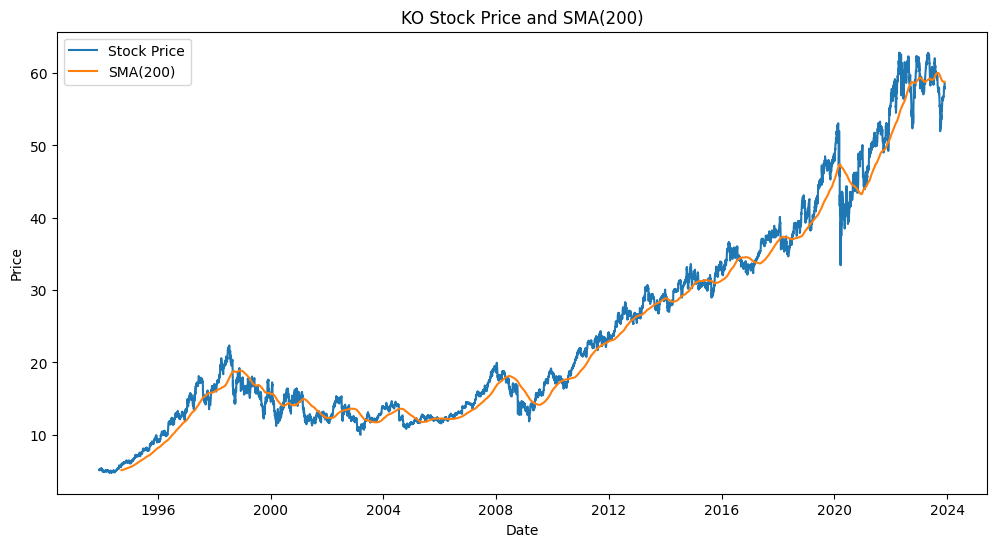

In [ ]:
# Plot of Stock Price
plt.figure(figsize = (12, 6))
plt.plot(data.index, data["Close"], label = "Stock Price")
plt.plot(data.index, data["sma_200"], label = "SMA(200)")
plt.title("KO Stock Price and SMA(200)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

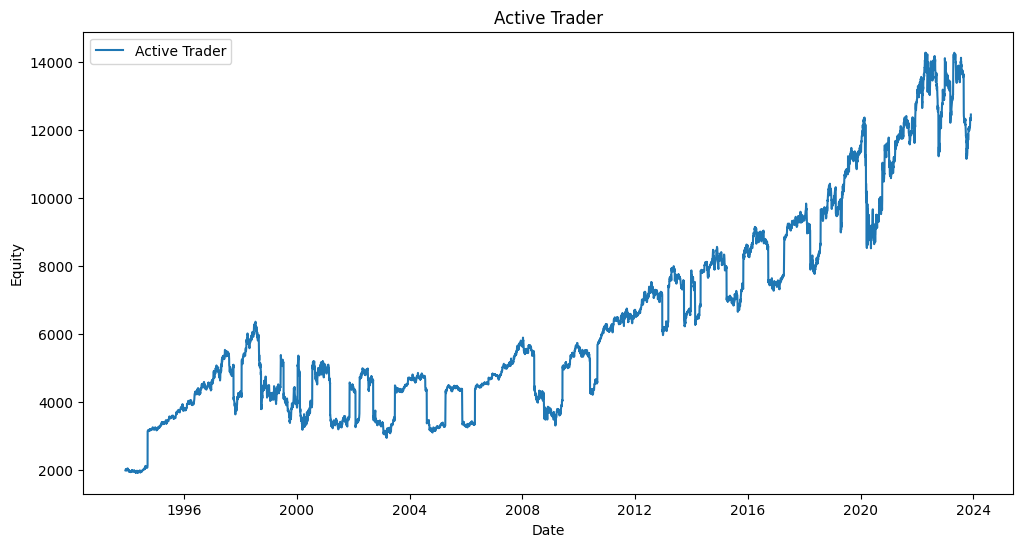

In [ ]:
# Plot the growth of money for Active trader
plt.figure(figsize = (12, 6))
plt.plot(data.index, active_trader_equity_over_time, label = "Active Trader")
plt.title("Active Trader")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.legend()
plt.show()

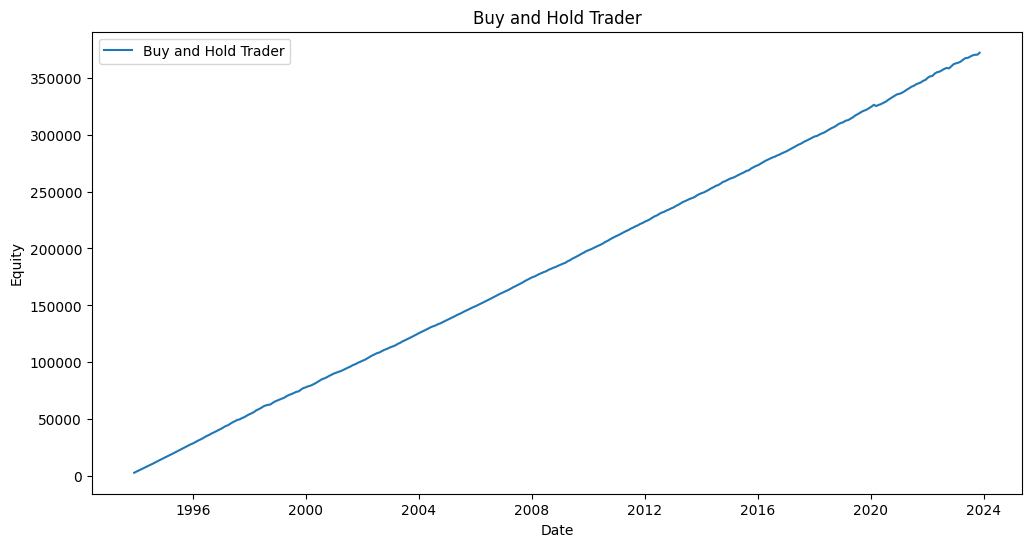

In [ ]:
# Plot the growth of money Buy and Hold trader
plt.figure(figsize = (12, 6))
plt.plot(monthly_date, buy_and_hold_equity_over_time, label = "Buy and Hold Trader")
plt.title("Buy and Hold Trader")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.legend()
plt.show()